<a href="https://colab.research.google.com/github/JulianSchneider21/shillerCapeRatio/blob/main/Shiller_CAPE_Ratio_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.6 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels
import statsmodels.api as sm
import yfinance as yf

**Data Prep**

In [ ]:
path = "http://www.econ.yale.edu/~shiller/data/ie_data.xls"
df = pd.read_excel(path, sheet_name="Data", skiprows=7)
df = df[["Date", "CAPE", "Real Return", "Returns.2"]].copy()
df.rename(columns={"Real Return": "Real_Returns_Equity", "Returns.2": "Excess_Real_Returns_Equity"}, inplace=True)
df = df.dropna()
df.head()
#print(df)

,Date,CAPE,Real_Returns_Equity,Excess_Real_Returns_Equity
120,1881.01,18.473952,0.045353,-0.011115
121,1881.02,18.147258,0.046774,-0.009425
122,1881.03,18.270119,0.042423,-0.012462
123,1881.04,17.950108,0.045971,-0.008665
124,1881.05,18.869719,0.041157,-0.013628


**CAPE Ratio Single Plot**

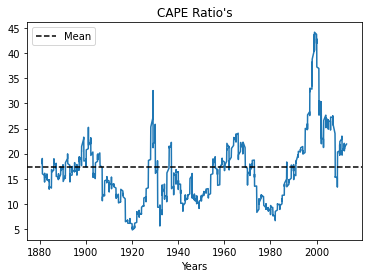

In [ ]:
plt.plot(df['Date'],df['CAPE'])
plt.axhline(y=17.35, color='black', linestyle='--', label='Mean') # Mean = manually calculated - Sum(CAPE(1880-2023/numberOfCAPERatios)
plt.title("CAPE Ratio's")
plt.xlabel("Years")
plt.legend()

**Actual Returns Single Plot**

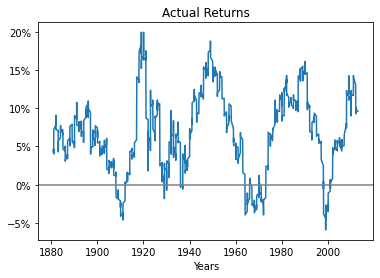

In [ ]:
plt.plot(df['Date'],df['Real_Returns_Equity'])
plt.axhline(y=0, color='grey', linestyle='-')
plt.title("Actual Returns")
plt.xlabel("Years")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))

**Combined Chart - Cape Ratio, Actual Returns and Forecast**

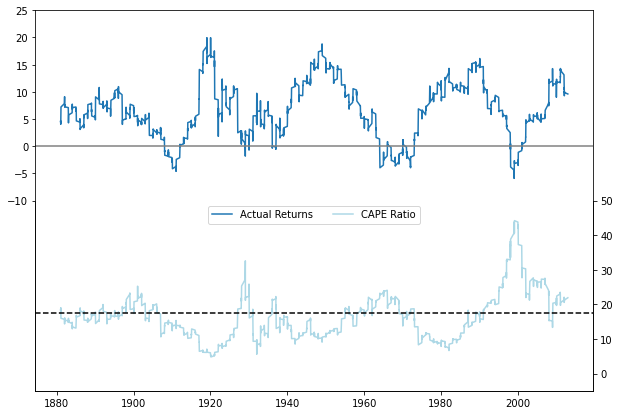

In [ ]:
fig, (ax1, ax_temporary) = plt.subplots(2,1)
fig.set_figheight(7)
fig.set_figwidth(10)
ax2 = ax_temporary.twinx()
for spine in (ax1.spines["bottom"], ax_temporary.spines["top"], ax2.spines["top"]):
  spine.set_visible(False)
ax1.xaxis.set_visible(False)
fig.subplots_adjust(hspace=0)
actual_returns_plot = ax1.plot(df['Date'],df['Real_Returns_Equity']*100, label="Actual Returns")
actual_returns_line = ax1.axhline(y=0, color='grey', linestyle='-')
acutal_returns_yaxes_limit = ax1.set_ylim((-10,25))
cape_ratio_plot = ax2.plot(df['Date'],df['CAPE'], color="lightblue", label="CAPE Ratio")
cape_ratio_line = ax2.axhline(y=17.35, color='black', linestyle='--')
cape_ratio_yaxes_limit = ax2.set_ylim((-5,50))
ax_temporary.yaxis.set_visible(False)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax2.legend(lines, labels, loc="upper center",ncol=2)

In [ ]:
x = 1/(np.array(df[(df["Date"]<=2023)]["CAPE"]).astype(float))
x = sm.add_constant(x)
y = np.array(df[(df["Date"]<=2023)]["Real_Returns_Equity"]).astype(float)

model = sm.OLS(y, x, missing="drop")
summary = model.fit()
summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     631.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.68e-117
Time:                        20:20:13   Log-Likelihood:                 2710.3
No. Observations:                1585   AIC:                            -5417.
Df Residuals:                    1583   BIC:                            -5406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.003      0.575      0.565      -0.004       0.007
x1             0.9123      0.036     25.124      0.000       0.841       0.983
==============================================================================
Omnibus:                       26.993   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.459
Skew:                          -0.079   Prob(JB):                     0.000267
Kurtosis:                       2.527   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""